In [124]:
import pandas as pd
import numpy as np

In [125]:
df_mental = pd.read_csv('data/Mental Health Dataset.csv')
df_mental

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [126]:
df_weather = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')
df_weather

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [127]:
df_mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

<AxesSubplot:>

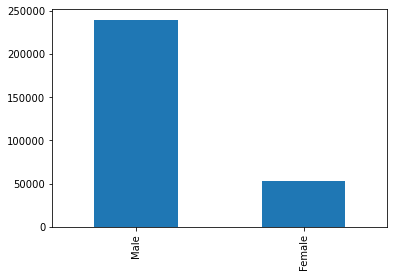

In [128]:
category_counts = df_mental['Gender'].value_counts()
category_counts.plot(kind='bar')

In [129]:
df_weather = df_weather.dropna()
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             544811 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  544811 non-null  float64
 3   Country                        544811 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.8+ MB


In [130]:
countries_mental = list(df_mental['Country'].unique())
countries_wether = list(df_weather['Country'].unique())
countries, not_countries_wether, not_countries_mental = [], [], []

for country_wheter in countries_wether:
    for country_mental in countries_mental:
        if country_wheter == country_mental:
            countries.append(country_wheter)
        else:
            not_countries_wether.append(country_mental)
            not_countries_mental.append(country_wheter) 

ord_not_countries_mental = list(set(not_countries_mental))
ord_not_countries_wether = list(set(not_countries_wether))

print('Total number of countries: ', len(countries))
print('Total countries: ', countries)
print('Total countries in mental but not in wether: ', ord_not_countries_wether)
print('Total countries in wether but not in mental: ', ord_not_countries_mental)

Total number of countries:  34
Total countries:  ['Australia', 'Belgium', 'Brazil', 'Canada', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'India', 'Ireland', 'Israel', 'Italy', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Philippines', 'Poland', 'Portugal', 'Russia', 'Singapore', 'South Africa', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States']
Total countries in mental but not in wether:  ['France', 'Germany', 'Singapore', 'Portugal', 'Russia', 'Colombia', 'Italy', 'Greece', 'Belgium', 'Czech Republic', 'Croatia', 'Finland', 'South Africa', 'Costa Rica', 'Switzerland', 'New Zealand', 'Moldova', 'Georgia', 'Australia', 'Nigeria', 'Brazil', 'Bosnia and Herzegovina', 'Sweden', 'Poland', 'Canada', 'Denmark', 'India', 'United Kingdom', 'Ireland', 'Philippines', 'Netherlands', 'Thailand', 'Mexico', 'Israel', 'United States']
Total countries in wether but not in mental:  ['Mozam

In [131]:
# Lista de países que quieres verificar
paises_a_verificar = countries_wether

# Lista de países en la que quieres buscar
paises_disponibles = countries_mental

# Convertimos la lista de países disponibles a un conjunto para búsqueda eficiente
paises_disponibles_set = set(paises_disponibles)

# Iteramos sobre la lista de países a verificar y comprobamos su presencia en el conjunto
paises_presentes = []
paises_ausentes = []

for pais in paises_a_verificar:
    if pais in paises_disponibles_set:
        paises_presentes.append(pais)
    else:
        paises_ausentes.append(pais)

print("Países presentes:", paises_presentes)
print("Países ausentes:", paises_ausentes)
print('num paises presentes:', len(paises_presentes))
print('num paises ausentes:', len(paises_ausentes))
print(len(countries_mental))
print(len(countries_wether))


Países presentes: ['Australia', 'Belgium', 'Brazil', 'Canada', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'India', 'Ireland', 'Israel', 'Italy', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Philippines', 'Poland', 'Portugal', 'Russia', 'Singapore', 'South Africa', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States']
Países ausentes: ['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina', 'Botswana', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia', 'Cameroon', 'Cape Verde', 'Cayman Islands', 'Central African R

In [132]:
paises_presentes == countries

True

In [133]:
df_wheather_filtrado = df_weather[df_weather['Country'].isin(paises_presentes)]

print("Países presentes:", paises_presentes)
print(len(paises_presentes))
print("\nDataFrame filtrado:")
print(df_wheather_filtrado)

Países presentes: ['Australia', 'Belgium', 'Brazil', 'Canada', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'India', 'Ireland', 'Israel', 'Italy', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Philippines', 'Poland', 'Portugal', 'Russia', 'Singapore', 'South Africa', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States']
34

DataFrame filtrado:
                dt  AverageTemperature  AverageTemperatureUncertainty  \
34816   1852-07-01              14.116                          1.530   
34817   1852-08-01              15.330                          1.400   
34818   1852-09-01              18.740                          1.446   
34819   1852-10-01              21.984                          1.493   
34820   1852-11-01              24.073                          1.466   
...            ...                 ...                            ...   
557816  2013-05-01              14

In [134]:
years = set(df_wheather_filtrado['dt'].unique())
print(years)

{'1814-07-01', '1957-10-01', '1825-09-01', '1782-05-01', '2011-08-01', '1933-11-01', '2006-04-01', '1823-05-01', '1874-01-01', '1828-02-01', '1774-02-01', '1936-03-01', '1903-02-01', '1890-08-01', '1884-12-01', '1914-01-01', '1919-10-01', '1981-04-01', '1834-10-01', '1793-05-01', '1875-12-01', '1790-02-01', '1895-11-01', '1771-05-01', '1925-03-01', '1816-11-01', '2009-04-01', '1930-02-01', '1945-06-01', '1853-12-01', '1943-12-01', '1812-02-01', '1941-10-01', '1827-03-01', '1892-02-01', '1782-06-01', '1859-02-01', '1854-11-01', '1954-02-01', '1840-09-01', '1893-11-01', '1813-08-01', '1996-12-01', '1928-05-01', '1885-06-01', '1897-04-01', '1870-05-01', '1768-06-01', '1949-12-01', '1764-05-01', '1866-02-01', '2007-12-01', '1878-07-01', '2011-03-01', '1931-04-01', '1995-11-01', '1801-02-01', '1966-12-01', '1909-06-01', '1756-01-01', '1871-09-01', '1766-04-01', '1859-08-01', '2008-09-01', '1856-01-01', '1973-02-01', '1974-06-01', '1979-01-01', '1944-12-01', '1766-05-01', '1791-05-01', '1809

In [135]:
years_weather = list(df_wheather_filtrado['dt'])
temperature = list(df_wheather_filtrado['AverageTemperature'])
countries_weather = list(df_wheather_filtrado['Country'])

In [136]:
year = []
for i in range(0, len(years_weather)):
    year.append(years_weather[i].split('-')[0])
print(year)

['1852', '1852', '1852', '1852', '1852', '1852', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1853', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1854', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1855', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1856', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1858', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1859', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1860', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1861', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1862', '1863', '1863', '1863',

In [137]:
countries_weather_csv = list(df_weather['Country'].unique())
countries_csv = list(df_weather['Country'])
temperatures = list(df_weather['AverageTemperature'])
print(len(countries_csv))
print(len(temperatures))

544811
544811


In [138]:
county_temperature = []
for i in range(0, len(countries_weather_csv)):
    mean_temperature = []
    for j in range(0, len(temperatures)):
        if countries_csv[j] == countries_weather_csv[i]:
            #print(countries_weather_csv[i], temperature[j])
            mean_temperature.append(temperatures[j])
            #print(mean_temperature)
    average = np.mean(mean_temperature)      
    county_temperature.append(average)
print(countries_weather_csv)
print(county_temperature)

['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros', 'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Europe', 'Falkland Islands (Islas Malv

In [139]:
nuevos_datos = pd.DataFrame({
    'Country': countries_weather_csv,
    'Temperature': county_temperature
})
print(nuevos_datos)

            Country  Temperature
0             Åland     5.291383
1       Afghanistan    14.045007
2            Africa    24.074203
3           Albania    12.610646
4           Algeria    22.985112
..              ...          ...
237  Virgin Islands    26.336523
238  Western Sahara    22.319818
239           Yemen    26.253597
240          Zambia    21.282956
241        Zimbabwe    21.117547

[242 rows x 2 columns]


In [140]:
df_final = pd.merge(df_mental, nuevos_datos, on='Country', how='left')

In [141]:
df_final.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options', 'Temperature'],
      dtype='object')

In [142]:
df_final[['self_employed', 'Occupation']]

,self_employed,Occupation
0,NaN,Corporate
1,NaN,Corporate
2,NaN,Corporate
3,No,Corporate
4,No,Corporate
...,...,...
292359,Yes,Business
292360,No,Business
292361,No,Business
292362,No,Business


In [143]:
df_final['self_employed'].unique()
unique_occupation = df_final['Occupation'].unique()

In [144]:
self_employed = list(df_final['self_employed'])
occupation = list(df_final['Occupation'])
total_nan, total_yes, total_no = [], [], []
for i in range(0, len(unique_occupation)):
    n_nan, n_yes, n_no = 0, 0, 0
    for j in range(0, len(self_employed)):
        if unique_occupation[i] == occupation[j]:
            if self_employed[j] == 'Yes':
                n_yes += 1
            elif self_employed[j] == 'No':
                n_no += 1
            else:
                n_nan += 1
    total_nan.append(n_nan)
    total_yes.append(n_yes)
    total_no.append(n_no)
    print('occupation: {}, yes: {}, No: {}, NaN: {}'.format(unique_occupation[i], n_yes, n_no, n_nan))
percent_nan = ((np.sum(total_yes) + np.sum(total_no) + np.sum(total_nan)) - (np.sum(total_yes) + np.sum(total_no))) / (np.sum(total_yes) + np.sum(total_no) + np.sum(total_nan)) * 100
print(percent_nan)

occupation: Corporate, yes: 6213, No: 53944, NaN: 1072
occupation: Student, yes: 6120, No: 54567, NaN: 1107
occupation: Business, yes: 4975, No: 44277, NaN: 897
occupation: Housewife, yes: 6635, No: 58538, NaN: 1178
occupation: Others, yes: 5225, No: 46668, NaN: 948
1.7792888317303086


In [145]:
df_final = df_final.dropna()

In [146]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286772 entries, 3 to 292363
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Timestamp                286772 non-null  object 
 1   Gender                   286772 non-null  object 
 2   Country                  286772 non-null  object 
 3   Occupation               286772 non-null  object 
 4   self_employed            286772 non-null  object 
 5   family_history           286772 non-null  object 
 6   treatment                286772 non-null  object 
 7   Days_Indoors             286772 non-null  object 
 8   Growing_Stress           286772 non-null  object 
 9   Changes_Habits           286772 non-null  object 
 10  Mental_Health_History    286772 non-null  object 
 11  Mood_Swings              286772 non-null  object 
 12  Coping_Struggles         286772 non-null  object 
 13  Work_Interest            286772 non-null  object 
 14  Soci

In [147]:
nuevos_datos.to_csv('data/Temperatures.csv')

In [150]:
list_countries = list(df_final['Country'].unique())
countries = list(df_final['Country'])
indoor_days = list(df_final['Days_Indoors'].unique())
days_indoor = list(df_final['Days_Indoors'])
print(indoor_days)
print(len(list_countries))
print(len(indoor_days))
print(len(days_indoor))
print(len(countries))

['1-14 days', 'Go out Every day', 'More than 2 months', '15-30 days', '31-60 days']
34
5
286772
286772


In [161]:
countries_indoor, n_indoors, category_indoor = [], [], []
for i in range(0, len(list_countries)):
    for j in range(0, len(indoor_days)):
        n = 0
        for k in range(0, len(days_indoor)):
            if (countries[k] == list_countries[i]) and (days_indoor[k] == indoor_days[j]):
                n += 1
        category_indoor.append(indoor_days[j])
        countries_indoor.append(list_countries[i])
        n_indoors.append(n)
print(countries_indoor)
print(category_indoor)
print(n_indoors)

['United States', 'United States', 'United States', 'United States', 'United States', 'Poland', 'Poland', 'Poland', 'Poland', 'Poland', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'South Africa', 'South Africa', 'South Africa', 'South Africa', 'South Africa', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand', 'Netherlands', 'Netherlands', 'Netherlands', 'Netherlands', 'Netherlands', 'India', 'India', 'India', 'India', 'India', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Ireland', 'Ireland', 'Ireland', 'Ireland', 'Ireland', 'France', 'France', 'France', 'France', 'France', 'Portugal', 'Portugal', 'Portugal', 'Portugal', 'Portugal', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Costa Rica', 'Costa R

In [174]:
different_countries = list(set(countries_indoor))
any_days, catorce, treinta, sesenta, two_month = [], [], [], [], []
for i in range(0, len(different_countries)):
    total = []
    for j in range(0, len(countries_indoor)):
        if countries_indoor[j] == different_countries[i]:
            total.append(n_indoors[j])
            #print(i, total)
    sum_total = np.sum(total)
    print(total, sum_total)
    any_days.append((total[1]/sum_total) * 100)
    catorce.append((total[0]/sum_total) * 100)
    treinta.append((total[3]/sum_total) * 100)
    sesenta.append((total[4]/sum_total) * 100)
    two_month.append((total[2]/sum_total) * 100)
#print(different_countries)
#print(catorce)
#print(any_days)

[522, 462, 444, 426, 486] 2340
[1044, 924, 888, 852, 972] 4680
[174, 154, 148, 142, 162] 780
[87, 77, 74, 71, 81] 390
[174, 154, 148, 142, 162] 780
[87, 77, 74, 71, 81] 390
[348, 308, 296, 284, 324] 1560
[174, 154, 148, 142, 162] 780
[170, 168, 160, 155, 171] 824
[87, 77, 74, 71, 81] 390
[87, 77, 74, 71, 81] 390
[87, 77, 74, 71, 81] 390
[431, 399, 382, 368, 414] 1994
[87, 77, 74, 71, 81] 390
[348, 308, 296, 284, 324] 1560
[431, 399, 382, 368, 414] 1994
[87, 77, 74, 71, 81] 390
[87, 77, 74, 71, 81] 390
[1289, 1211, 1158, 1117, 1251] 6026
[87, 77, 74, 71, 81] 390
[522, 462, 444, 426, 486] 2340
[601, 567, 542, 523, 585] 2818
[170, 168, 160, 155, 171] 824
[3792, 3514, 3364, 3241, 3645] 17556
[174, 154, 148, 142, 162] 780
[605, 553, 530, 510, 576] 2774
[11072, 10080, 9664, 9296, 10512] 50624
[1210, 1106, 1060, 1020, 1152] 5548
[87, 77, 74, 71, 81] 390
[1301, 1169, 1122, 1078, 1224] 5894
[87, 77, 74, 71, 81] 390
[87, 77, 74, 71, 81] 390
[348, 308, 296, 284, 324] 1560
[36398, 33600, 32176, 30

In [172]:
nuevos_datos_indoors = pd.DataFrame({
    'Country': different_countries,
    'Go out Every day': any_days,
    '1-14 days  indoor': catorce,
    '15-30 days indoor': treinta,
    '31-60 days indoor': sesenta,
    'More than 2 months  indoor': two_month,
})
print(nuevos_datos_indoors)

           Country  Go out Every day  1-14 days  indoor  15-30 days indoor  \
0           France         19.743590          22.307692          18.205128   
1          Germany         19.743590          22.307692          18.205128   
2        Singapore         19.743590          22.307692          18.205128   
3         Portugal         19.743590          22.307692          18.205128   
4           Russia         19.743590          22.307692          18.205128   
5         Colombia         19.743590          22.307692          18.205128   
6            Italy         19.743590          22.307692          18.205128   
7           Greece         19.743590          22.307692          18.205128   
8          Belgium         20.388350          20.631068          18.810680   
9   Czech Republic         19.743590          22.307692          18.205128   
10         Croatia         19.743590          22.307692          18.205128   
11         Finland         19.743590          22.307692         

In [173]:
nuevos_datos_indoors.to_csv('data/Indoors.csv')

In [183]:
treatment = list(df_final['treatment'].unique())
growing_sttress = list(df_final['Growing_Stress'].unique())
change_habits = list(df_final['Changes_Habits'].unique())
mental_history = list(df_final['Mental_Health_History'].unique())
mood_swing = list(df_final['Mood_Swings'].unique())
work_interest = list(df_final['Work_Interest'].unique())
social_weakness = list(df_final['Social_Weakness'].unique())
interview = list(df_final['mental_health_interview'].unique())
care = list(df_final['care_options'].unique())
coping_struggles = list(df_final['Coping_Struggles'].unique())

print('2', treatment)
print('3', growing_sttress)
print('4', change_habits)
print('5', mental_history)
print('6', mood_swing)
print('7', work_interest)
print('8', social_weakness)
print('9', interview)
print('10', care)
print('11', coping_struggles)

2 ['Yes', 'No']
3 ['Yes', 'No', 'Maybe']
4 ['No', 'Yes', 'Maybe']
5 ['Yes', 'No', 'Maybe']
6 ['Medium', 'Low', 'High']
7 ['No', 'Maybe', 'Yes']
8 ['Yes', 'No', 'Maybe']
9 ['Maybe', 'No', 'Yes']
10 ['Yes', 'Not sure', 'No']
11 ['No', 'Yes']


In [185]:
paises_healthy = list(df_final['Country'])
treatment = list(df_final['treatment'])
growing_sttress = list(df_final['Growing_Stress'])
change_habits = list(df_final['Changes_Habits'])
mental_history = list(df_final['Mental_Health_History'])
mood_swing = list(df_final['Mood_Swings'])
work_interest = list(df_final['Work_Interest'])
social_weakness = list(df_final['Social_Weakness'])
interview = list(df_final['mental_health_interview'])
care = list(df_final['care_options'])
coping_struggles = list(df_final['Coping_Struggles'])

In [189]:
total_healthy = []
for i in range(0, len(different_countries)):
    n = 0
    healthy = 0
    for j in range(0, len(paises_healthy)):
        if paises_healthy[j] == different_countries[i]:
            if treatment[j] == 'Yes':
                healthy += 1
            if growing_sttress[j] == 'Yes':
                healthy += 2
            elif growing_sttress[j] == 'Maybe':
                healthy += 1
            if change_habits[j] == 'Yes':
                healthy += 2
            elif change_habits[j] == 'Maybe':
                healthy += 1
            if mental_history[j] == 'Yes':
                healthy += 2
            elif mental_history[j] == 'Maybe':
                healthy += 1
            if mood_swing[j] == 'High':
                healthy += 2
            elif mood_swing[j] == 'Medium':
                healthy += 1
            if work_interest[j] == 'Yes':
                healthy += 2
            elif work_interest[j] == 'Maybe':
                healthy += 1
            if social_weakness[j] == 'Yes':
                healthy += 2
            elif social_weakness[j] == 'Maybe':
                healthy += 1
            if interview[j] == 'Yes':
                healthy += 2
            elif interview[j] == 'Maybe':
                healthy += 1
            if care[j] == 'Yes':
                healthy += 2
            elif care[j] == 'Maybe':
                healthy += 1
            if coping_struggles[j] == 'Yes':
                healthy += 1
            n += 1
    print(n, healthy)
    total_healthy.append(healthy / n)
print(different_countries)
print(total_healthy)

2340 16866
4680 39582
780 4972
390 3266
780 4972
390 2486
1560 10334
780 4972
824 5739
390 3656
390 2876
390 2486
1994 15669
390 3656
1560 10724
1994 17531
390 4436
390 2486
6026 48466
390 2486
2340 18036
2818 22276
824 6607
17556 139353
780 8092
2774 19773
50624 382972
5548 40716
390 2486
5894 42347
390 2876
390 2486
1560 11114
168056 1332025
['France', 'Germany', 'Singapore', 'Portugal', 'Russia', 'Colombia', 'Italy', 'Greece', 'Belgium', 'Czech Republic', 'Croatia', 'Finland', 'South Africa', 'Costa Rica', 'Switzerland', 'New Zealand', 'Moldova', 'Georgia', 'Australia', 'Nigeria', 'Brazil', 'Sweden', 'Poland', 'Canada', 'Denmark', 'India', 'United Kingdom', 'Ireland', 'Philippines', 'Netherlands', 'Thailand', 'Mexico', 'Israel', 'United States']
[7.207692307692308, 8.457692307692307, 6.374358974358974, 8.374358974358975, 6.374358974358974, 6.374358974358974, 6.624358974358974, 6.374358974358974, 6.964805825242719, 9.374358974358975, 7.374358974358974, 6.374358974358974, 7.8580742226

In [193]:
categorical_healthy = []
for i in range(0, len(total_healthy)):
    if total_healthy[i] < 7.0:
        categorical_healthy.append('Bad')
    elif  7.0 <= total_healthy[i] < 9.0:
        categorical_healthy.append('Regular')
    elif total_healthy[i] >= 9.0:
        categorical_healthy.append('good')
    print(f'Country: {different_countries[i]}, healthy level: {categorical_healthy[i]}')

Country: France, healthy level: Regular
Country: Germany, healthy level: Regular
Country: Singapore, healthy level: Bad
Country: Portugal, healthy level: Regular
Country: Russia, healthy level: Bad
Country: Colombia, healthy level: Bad
Country: Italy, healthy level: Bad
Country: Greece, healthy level: Bad
Country: Belgium, healthy level: Bad
Country: Czech Republic, healthy level: good
Country: Croatia, healthy level: Regular
Country: Finland, healthy level: Bad
Country: South Africa, healthy level: Regular
Country: Costa Rica, healthy level: good
Country: Switzerland, healthy level: Bad
Country: New Zealand, healthy level: Regular
Country: Moldova, healthy level: good
Country: Georgia, healthy level: Bad
Country: Australia, healthy level: Regular
Country: Nigeria, healthy level: Bad
Country: Brazil, healthy level: Regular
Country: Sweden, healthy level: Regular
Country: Poland, healthy level: Regular
Country: Canada, healthy level: Regular
Country: Denmark, healthy level: good
Country

In [195]:
nuevos_datos_healthy = pd.DataFrame({
    'Country': different_countries,
    'Healthy num': total_healthy,
    'Categorical healthy': categorical_healthy,
})
print(nuevos_datos_healthy)

           Country  Healthy num Categorical healthy
0           France     7.207692             Regular
1          Germany     8.457692             Regular
2        Singapore     6.374359                 Bad
3         Portugal     8.374359             Regular
4           Russia     6.374359                 Bad
5         Colombia     6.374359                 Bad
6            Italy     6.624359                 Bad
7           Greece     6.374359                 Bad
8          Belgium     6.964806                 Bad
9   Czech Republic     9.374359                good
10         Croatia     7.374359             Regular
11         Finland     6.374359                 Bad
12    South Africa     7.858074             Regular
13      Costa Rica     9.374359                good
14     Switzerland     6.874359                 Bad
15     New Zealand     8.791876             Regular
16         Moldova    11.374359                good
17         Georgia     6.374359                 Bad
18       Aus

In [197]:
nuevos_datos_healthy.to_csv('data/healthy.csv')